In [1]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2

# DAMLAS - Machine Learning At Scale
## Assignment - HW4
Data Analytics and Machine Learning at Scale
Target, Minneapolis

---
__Name:__  Scott Zuehlke   
__Class:__ DAMLAS Summer 2016    
__Email:__ Scott.Zuehlke@Target.com     
__Week:__   04

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW 4 Problems](#3)   
    4.0.  [Final Project description](#4.0)   
    4.1.  [Build a decision to predict whether you can play tennis or no](#4.1)   
    4.2.  [Regression Tree (OPTIONAL Homework)](#4.2)    
    4.3.  [Predict survival on the Titanic](#4.3)    
    4.4.  [Heritage Healthcare Prize (Predict # Days in Hospital next year)](#4.4)  


<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Thursday, 08/18/2016 at 11AM (CT).


* Prepare a single Jupyter notebook (not a requirment), please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](http://goo.gl/forms/er3OFr5eCMWDngB72)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.

<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* [Lecture Slides on Decision Trees and Ensembles](https://www.dropbox.com/s/lm4vuocqoq6mq7k/Lecture-13-Decision-Trees-PLanet.pdf?dl=0)

* Chapter 17 on decision Trees,   https://www.dropbox.com/s/5ca98ah5chqlcmn/Data_Science_from_Scratch%20%281%29.pdf?dl=0   [Please do not share this PDF]
* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. __(Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))__
* Ryza, Sandy, Laserson, Uri, Owen, Sean, & Wills, Josh. (2015). Advanced analytics with Spark: Patterns for learning from data at scale. Sebastopol, CA: O’Reilly Publishers.
---

---

## 3.  HW4  <a name="4"></a>
[Back to Table of Contents](#TOC)

 <a name="4.0"></a>
## HW4.0 Final Project description

Please prepare your project description using the following format
* 200 words abstract
* data source and description
* pipeline of steps (in a block diagram)
* Metrics for success

PLEASE NOTE: We will probably have project team sizes of 3 people plus/minus 1

https://github.com/zuehlkescott5/MachineLearning/blob/master/TargetDataScienceTraining/Week%202/HW4/DaQuiri%20DAMLAS%20proposal.pdf

 <a name="4.1"></a>
## HW4.1 Build a decision to predict whether you can play tennis or not

[Back to Table of Contents](#TOC)

Decision Trees

Write a program in Python (or in Spark; this part is optional) to implement the ID3 decision tree algorithm. You should build a tree to predict PlayTennis, based on the other attributes (but, do not use the Day attribute in your tree.). You should read in a space delimited dataset in a file called dataset.txt and output to the screen your decision tree and the training set accuracy in some readable format. For example, here is the tennis dataset. The first line will contain the names of the fields:

<PRE>
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no
</PRE>

The last column is the classification attribute, and will always contain contain the values yes or no.

For output, you can choose how to draw the tree so long as it is clear what the tree is. You might find it easier if you turn the decision tree on its side, and use indentation to show levels of the tree as it grows from the left. For example:

<PRE>
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes

</PRE>

You don't need to make your tree output look exactly like above: feel free to print out something similarly readable if you think it is easier to code.

You may find Python dictionaries especially useful here, as they will give you a quick an easy way to help manage counting the number of times you see a particular attribute.

Here are some FAQs that I've gotten in the past regarding this assignment, and some I might get if I don't answer them now.

__Should my code work for other datasets besides the tennis dataset?__ 
Yes. We will give your program a different dataset to try it out with. You may assume that our dataset is correct and well-formatted, but you should not make assumptions regrading number of rows, number of columns, or values that will appear within. The last column will also be the classification, and will always contain yes or no values.

__Is it possible that some value, like "normal," could appear in more than one column?__
Yes. In addition to the column "humidity", we might have had another column called "skycolor" which could have values "normal," "weird," and "bizarre."

__Could "yes" and "no" appear as possible values in columns other than the classification column?__
Yes. In addition to the classification column "playtennis," we might have had another column called "seasonalweather" which would contain "yes" and "no."

### Write data set to text file.

In [3]:
%%writefile playtennis41.txt
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d13 rainy mild high TRUE no

Overwriting playtennis41.txt


### Define objects required for decision tree build, classification, and evaluation.

In [4]:
from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random
import pandas
import numpy as np

def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

def class_probabilities(labels):
    total_count = len(labels)
    return [count/total_count for count in Counter(labels).values()]

def data_entropy(labeled_data):        
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)    
    return sum(data_entropy(subset)*len(subset)/total_count for subset in subsets )

def inputformat(fileName, delim, classifycolumn, differentiator):
    input_df = pandas.read_table(fileName, sep=delim)
    del input_df[differentiator]
    inputs = input_df.iloc[:,:len(input_df.columns)-1].T.to_dict().values()
    labels = input_df[[len(input_df.columns)-1]].T.to_dict().values()
    formattedInput = list(zip(inputs, [d[classifycolumn] for d in labels]))
    return formattedInput

def group_by(items, key_fn):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item)
        groups[key].append(item)
    return groups
    
def partition_by(inputs, attribute):
    """returns a dict of inputs partitioned by the attribute
    each input is a pair (attribute_dict, label)"""
    return group_by(inputs, lambda x: x[0][attribute]) 

def partition_entropy_by(inputs, attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

def build_tree_id3(inputs, split_candidates=None):

    # if this is our first pass, 
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()

    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = [label for item, label in inputs if label].count('yes')
    num_falses = num_inputs - num_trues
    
    if num_trues == 0:                  # if only Falses are left
        return False                    # return a "False" leaf
        
    if num_falses == 0:                 # if only Trues are left
        return True                     # return a "True" leaf

    if not split_candidates:            # if no split candidates left
        return num_trues >= num_falses  # return the majority leaf
                            
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
        key=partial(partition_entropy_by, inputs))

    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates 
                      if a != best_attribute]
    
    # recursively build the subtrees
    subtrees = { attribute : build_tree_id3(subset, new_candidates)
                 for attribute, subset in partitions.iteritems() }

    subtrees[None] = num_trues > num_falses # default case
    
    return (best_attribute, subtrees)

def classify(tree, input):
    """classify the input using the given decision tree"""
    
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
   
    # otherwise find the correct subtree
    attribute, subtree_dict = tree
    
    subtree_key = input.get(attribute)  # None if input is missing attribute

    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None              # we'll use the None subtree
    
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input)     # and use it to classify the input

def evaluateTree(test_df, test_inputs, tree, classifycolumn, testpos, testneg):
    preds = []

    for i in test_inputs:
        preds.append(classify(tree, i[0]))
        
    prediction = pandas.DataFrame({'prediction': preds})
    test_df = test_df.join(prediction)
    test_df['evaluation'] = np.where((test_df[classifycolumn] == testneg) & (test_df['prediction'] == False) | 
                                  (test_df[classifycolumn] == testpos) & (test_df['prediction'] == True),1,0) 
    
    numCorrect = np.sum(test_df['evaluation'])
    numTotal = total_rows=len(test_df.axes[0])
    accuracy = numCorrect / numTotal
    incorrect_predictions = test_df[test_df.evaluation == 0]
    print("Number of correct predictions: " + str(numCorrect))
    print("Number of made predictions:  " + str(numTotal))
    print("Prediction accuracy:  " + str(accuracy*100) + "%")
    print("Incorrect predictions:  ")
    print(incorrect_predictions)

### Create pandas data frame of data

In [5]:
import pandas
input_dfhw41 = pandas.read_table('playtennis41.txt', sep = " ")
input_dfhw41

,Day,outlook,temperature,humidity,wind,playtennis
0,d1,sunny,hot,high,False,no
1,d2,sunny,hot,high,True,no
2,d3,overcast,hot,high,False,yes
3,d4,rainy,mild,high,False,yes
4,d5,rainy,cool,normal,False,yes
5,d6,rainy,cool,normal,True,no
6,d6,overcast,cool,normal,True,yes
7,d7,sunny,mild,high,False,no
8,d8,sunny,cool,normal,False,yes
9,d9,rainy,mild,normal,False,yes


### Create inputs file.  Input file is list of pairs where first element is attribute dictionary and second element is label.  Then build the decision tree using ID3 method

In [6]:
inputs_hw41 = inputformat('playtennis41.txt', delim=" ", classifycolumn = 'playtennis', differentiator = 'Day')

In [7]:
tree_hw41 = build_tree_id3(inputs_hw41)

### Pythonic View of Decision Tree

In [8]:
tree_hw41

('outlook',
 {None: True,
  'overcast': True,
  'rainy': ('wind', {None: True, False: True, True: False}),
  'sunny': ('humidity', {None: False, 'high': False, 'normal': True})})

### Bulleted View of Decision Tree:
* Split on Outlook

    * If the outlook is overcast, always yes.
    * If the outlook is sunny, we split on humidity.
        * If humidity is High, always no.
        * If humidity is Normal, always yes.
    * If the outlook is rainy, we split on wind.
        * If wind is strong, always no.
        * If wind is weak, always yes.

###  Visual View of Decision Tree

                                     Outlook
                                    /   |   \
                                   /    |    \
                                  /     |     \
                               Sunny Overcast Rainy
                              /         |         \
                             /          |          \
                            /           |           \
                       Humidity         |          Wind
                        /  \            |          /   \
                       /    \           |         /     \
                      /      \          |        /       \
                  High      Normal      |      True    False
                   /             \      |      /           \ 
                  /               \     |     /             \
                 /                 \    |    /               \
                NO                YES  YES  NO               YES

### HW4.1.1 What is the classification accuracy of the tree on the training data?

In [9]:
evaluateTree(input_dfhw41, inputs_hw41, tree_hw41, 'playtennis', 'yes', 'no')

Number of correct predictions: 14
Number of made predictions:  14
Prediction accuracy:  100.0%
Incorrect predictions:  
Empty DataFrame
Columns: [Day, outlook, temperature, humidity, wind, playtennis, prediction, evaluation]
Index: []


The tree predicts everything with perfect accuracy.  This makes sense given that we're building on the entire data set (with every possibility established) and everything ends in either a true or a false.

### HW4.1.2  Is it possible to produce some set of correct training examples that will get the algorithm to include the attribute Temperature in the learned tree, even though the true target concept is independent of Temperature? if no, explain. If yes, give such a set.

In [10]:
%%writefile playtennis412.txt
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes

Overwriting playtennis412.txt


In [11]:
import pandas
input_dfhw41 = pandas.read_table('playtennis412.txt', sep = " ")
input_dfhw41

,Day,outlook,temperature,humidity,wind,playtennis
0,d1,sunny,hot,high,False,no
1,d2,sunny,hot,high,True,no
2,d3,overcast,hot,high,False,yes
3,d4,rainy,mild,high,False,yes
4,d5,rainy,cool,normal,False,yes
5,d6,rainy,cool,normal,True,no
6,d6,overcast,cool,normal,True,yes
7,d7,sunny,mild,high,False,no
8,d8,sunny,cool,normal,False,yes
9,d9,rainy,mild,normal,False,yes


In [12]:
inputs_hw412 = inputformat('playtennis412.txt', delim=" ", classifycolumn = 'playtennis', differentiator = 'Day')

In [13]:
build_tree_id3(inputs_hw412)

('outlook',
 {None: True,
  'overcast': True,
  'rainy': ('wind', {None: True, False: True, True: False}),
  'sunny': ('temperature',
   {None: False, 'cool': True, 'hot': False, 'mild': False})})

Just by trial and error form the original data set, Removing rows d10 - d12 forces temperature to be split when the outlook is sunny.

### HW4.1.3  Now, build a tree using only examples D1–D7. What is the classification accuracy for the training set? What is the accuracy for the test set (examples D8–D14)? explain why you think these are the results.

In [14]:
%%writefile playtennis_413train.txt
Day outlook temperature humidity wind playtennis
d1 sunny hot high FALSE no
d2 sunny hot high TRUE no
d3 overcast hot high FALSE yes
d4 rainy mild high FALSE yes
d5 rainy cool normal FALSE yes
d6 rainy cool normal TRUE no
d6 overcast cool normal TRUE yes
d7 sunny mild high FALSE no

Overwriting playtennis_413train.txt


In [15]:
%%writefile playtennis_413test.txt
Day outlook temperature humidity wind playtennis
d8 sunny cool normal FALSE yes
d9 rainy mild normal FALSE yes
d10 sunny mild normal TRUE yes
d11 overcast mild high TRUE yes
d12 overcast hot normal FALSE yes
d12 rainy mild high TRUE no

Overwriting playtennis_413test.txt


In [16]:
import pandas
input_df_413train = pandas.read_table('playtennis_413train.txt', sep = " ")
input_df_413test = pandas.read_table('playtennis_413test.txt', sep = " ")

In [17]:
inputs_413train = inputformat('playtennis_413train.txt', delim=" ", classifycolumn = 'playtennis', differentiator = 'Day')
inputs_413test = inputformat('playtennis_413test.txt', delim=" ", classifycolumn = 'playtennis', differentiator = 'Day')

In [18]:
tree_hw413 = build_tree_id3(inputs_413train)
tree_hw413

('outlook',
 {None: False,
  'overcast': True,
  'rainy': ('wind', {None: True, False: True, True: False}),
  'sunny': False})

### Classification accuracy of training set

In [19]:
evaluateTree(input_df_413train, inputs_413train, tree_hw413, 'playtennis', 'yes', 'no')

Number of correct predictions: 8
Number of made predictions:  8
Prediction accuracy:  100.0%
Incorrect predictions:  
Empty DataFrame
Columns: [Day, outlook, temperature, humidity, wind, playtennis, prediction, evaluation]
Index: []


### Classification accuracy of test set.

In [20]:
evaluateTree(input_df_413test, inputs_413test, tree_hw413, 'playtennis', 'yes', 'no')

Number of correct predictions: 4
Number of made predictions:  6
Prediction accuracy:  66.6666666667%
Incorrect predictions:  
   Day outlook temperature humidity   wind playtennis prediction  evaluation
0   d8   sunny        cool   normal  False        yes      False           0
2  d10   sunny        mild   normal   True        yes      False           0


It makes sense that validating on the training set leads to perfect accuracy, because we're defining all relationships based on all training data and then testing.  The reduction in accuracy on the test set is because there are new relationships in the test set that didn't exist, so the prediction becomes just a guess of what's more popular.

### HW4.1.4 In this case, and others, there are only a few labelled examples available for training (that is, no additional data is available for testing or validation). Suggest a concrete pruning strategy, that can be readily embedded in the algorithm, to avoid over fitting. Explain why you think this strategy should work.

Build the tree to its entirety on the train set and validate against test set.  Remove a node, test again.  Iterate across all nodes (this is very similar to the cross validation method for regression algorithms).  If any nodes decrease error, remove it.  This should produce a smaller version of the tree, which by nature would reduce overfittin gof the model.

 <a name="4.2"></a>
 ## HW4.2 Regression Tree (OPTIONAL Homework) 
 
[Back to Table of Contents](#TOC)

Implement a decision tree algorithm for regression for two input continous variables and one categorical input variable on a single core computer using Python. 

- Use the IRIS dataset to evaluate your code, where the input variables are: Petal.Length Petal.Width  Species  and the target or output variable is  Sepal.Length. 
- Use the same dataset to train and test your implementation. 
- Stop expanding nodes once you have less than ten (10) examples (along with the usual stopping criteria). 
- Report the mean squared error for your implementation and contrast that with the MSE from scikit-learn's implementation on this dataset (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


 <a name="4.3"></a>
## HW4.3 Predict survival on the Titanic using Python (Logistic regression, SVMs, Random Forests)

[Back to Table of Contents](#TOC)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, you need to review (and edit the code) in this [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/kmbgrkhh73931lo/Titanic-EDA-LogisticRegression.ipynb) to do analysis of what sorts of people were likely to survive. In particular, please look at how the tools of machine learning are used to predict which passengers survived the tragedy. Please share any usefule graphs/analysis you come up with via the group email.

For more details see:

* https://www.kaggle.com/c/titanic

### Pull data from Kaggle website using curl

In [21]:
!curl -L https://www.kaggle.com/c/titanic/download/train.csv -o train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   179  100   179    0     0    507      0 --:--:-- --:--:-- --:--:--   707
100 15343  100 15343    0     0  30638      0 --:--:-- --:--:-- --:--:-- 30638


### Import necessary packages

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV

### Read in data from train set and check descriptive stats

In [38]:
train_full = pd.read_csv('train.csv')
train_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Intuitively, Age seems important.  So, rather than delete missing values, I'll replace them with a median.  Median is better than mean since it is more asymptotically stable, and less impacted by outliers.  Because I'll want to compare before and after, I'm keeping my train_full dataframe and creating a copy I can alter.

In [39]:
train_changed = train_full.copy(deep=True)

In [40]:
train_changed['Age'].fillna(train_changed['Age'].median(), inplace=True)

### Checking again, now we have a value for all ages.  

In [41]:
train_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
train_changed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Now I'll check if any other columns have missing values. 

In [43]:
len(train_changed.index) - train_changed.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Because missing Cabin is such a substantial percent of total, I'll just create a new value and group them all together.  Since Embarked is missing a tiny amount, I'll remove these.

In [44]:
train_changed['Cabin'].fillna('Missing', inplace=True)
train_changed = train_changed.dropna()

### Check one more time that no values are missing anymore.

In [45]:
len(train_changed.index) - train_changed.count()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### So, rather than delete data, we just created a new value for Cabin called 'missing' and deleted the two rows where Embarked is empty.  We also substited missing Age values with the column median.

In [46]:
train_changed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S


### Now let's take a look at our data set with these replacements.  First, survival based on age.

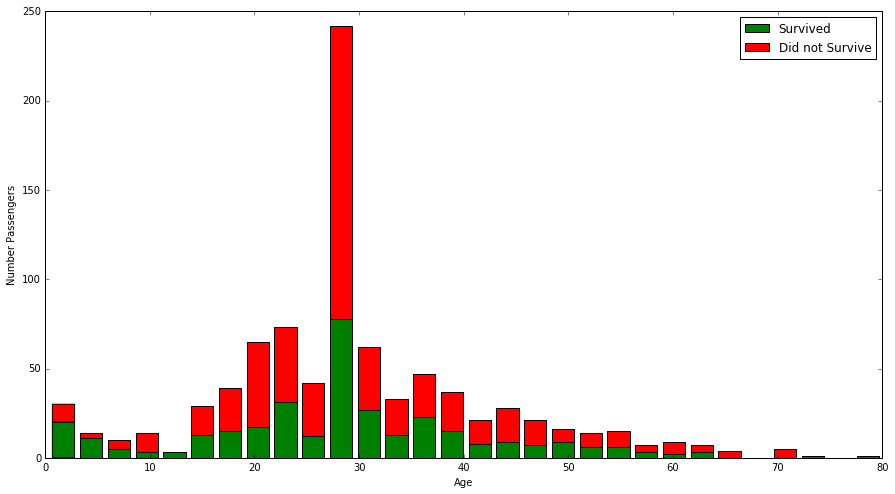

In [47]:
figure = plt.figure(figsize=(15,8))
plt.hist([train_changed[train_changed['Survived']==1]['Age'],train_changed[train_changed['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Did not Survive'])
plt.xlabel('Age')
plt.ylabel('Number Passengers')
plt.legend()

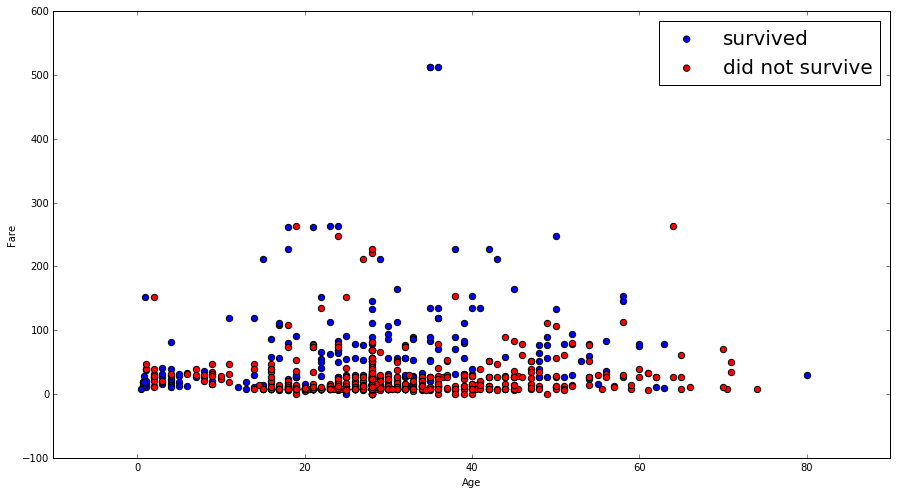

In [48]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train_changed[train_changed['Survived']==1]['Age'],train_changed[train_changed['Survived']==1]['Fare'],c='blue',s=40)
ax.scatter(train_changed[train_changed['Survived']==0]['Age'],train_changed[train_changed['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','did not survive'),scatterpoints=1,loc='upper right',fontsize=20,)

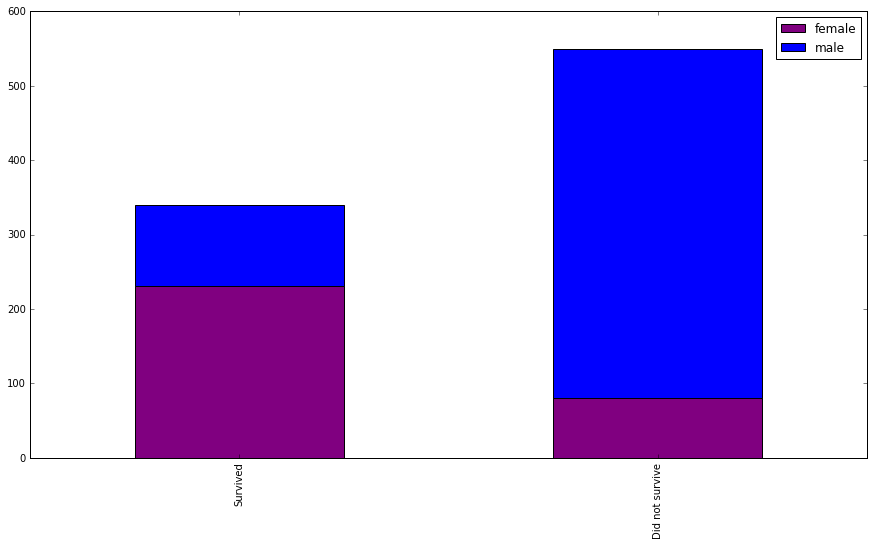

In [49]:
survived_sex = train_changed[train_changed['Survived']==1]['Sex'].value_counts()
dead_sex = train_changed[train_changed['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Did not survive']
df.plot(kind='bar',stacked=True, figsize=(15,8), color=['purple', 'blue'])

### Now to build a random forest decision tree.  First is to create some features based on the provided attributes.

In [50]:
# First, titles.  Create a distinct list of titles by stripping names
# and saving prefixes.  Will use this to see if salutation has any
# value.

train_changed['Title'] = \
train_changed['Name'].map(lambda name:name.split(',')[1] \
                     .split('.')[0].strip())
train_changed['Title'].unique()
# array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
#        'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
#        'Jonkheer'], dtype=object)

# Add some categorical bins.
titlesdict = {
                "Mr": "Mr", "Mrs" : "Mrs", "Miss": "Miss", "Master": "Master", "Don": "Royalty", "Rev": "Staff",
                "Dr": "Staff", "Mme": "Mrs","Ms": "Mrs","Major": "Staff","Lady" : "Royalty", "Sir" : "Royalty",
                "Mlle": "Miss","Col": "Staff", "Capt": "Staff", "the Countess": "Royalty", "Jonkheer": "Royalty",    
                "Dona": "Royalty",
            }

train_changed['Title'] = train_changed.Title.map(titlesdict)

# Add title features to data set and drop Name and Title columns

titleDummies = pd.get_dummies(train_changed['Title'],prefix='Salutation')
train_changed = pd.concat([train_changed,titleDummies],axis=1)

train_changed.drop('Name',axis=1,inplace=True)
train_changed.drop('Title',axis=1,inplace=True)

# Add embark data to features and drop Embarked column
embarkedDummies = pd.get_dummies(train_changed['Embarked'],prefix='Embarked')
train_changed = pd.concat([train_changed,embarkedDummies],axis=1)
train_changed.drop('Embarked',axis=1,inplace=True)

# Add Cabin data to features and drop Cabin column
train_changed['Cabin'] = train_changed['Cabin'].map(lambda c : c[0])

cabinDummies = pd.get_dummies(train_changed['Cabin'],prefix='Cabin')
train_changed = pd.concat([train_changed,cabinDummies],axis=1)
train_changed.drop('Cabin',axis=1,inplace=True)

# Now add a gender numeric binary column based on Sex and drop Sex column
train_changed['gender'] = train_changed['Sex'].map({'male': 1, 'female': 0})
train_changed.drop('Sex',axis=1,inplace=True)

# Add numeric value for class
pclassDummies = pd.get_dummies(train_changed['Pclass'],prefix="Pclass")
train_changed = pd.concat([train_changed,pclassDummies],axis=1)
train_changed.drop('Pclass',axis=1,inplace=True)

# Create a Family column and create values for different family sizes
train_changed['Family'] = train_changed['Parch'] + train_changed['SibSp'] + 1

train_changed['Loner'] = train_changed['Family'].map(lambda s : 1 if s == 1 else 0)
train_changed['SmallFam'] = train_changed['Family'].map(lambda s : 1 if 2<=s<=5 else 0)
train_changed['LargeFam'] = train_changed['Family'].map(lambda s : 1 if 6<=s else 0)
train_changed.drop('Family',axis=1,inplace=True)

# Drop Ticket column
train_changed.drop('Ticket',axis=1,inplace=True)

# Now show rows and columns.  
train_changed.shape

(889, 31)

###  I now have 889 rows and 31 features.  I now will split the data into test and train sets.

In [60]:
# Finally, create an array of actuals, then create random generated list of 
# 75% split vs 25% split

separator = np.random.rand(len(train_changed)) < 0.80

In [61]:
train = train_changed[separator]

In [62]:
test = train_changed[~separator]

### Now make sure train and test sets have been successfully created by checking row counts.

In [63]:
print("Train set has " + str(len(train)) + " rows.")
print("Test set has " + str(len(test)) + " rows.")

Train set has 705 rows.
Test set has 184 rows.


### Before starting the model, normalize the data by dividing each cell by the column max.

In [64]:
features = list(train.columns)
features.remove('PassengerId')
train[features] = train[features].apply(lambda x: x/x.max(), axis=0)

### Compute feature importance on train_changed set.

In [65]:
trainActs = train.Survived
train.drop('Survived', axis=1, inplace=True)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [66]:
testActs = test.Survived
test.drop('Survived', axis=1, inplace=True)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [67]:
etc = ExtraTreesClassifier(n_estimators=200)
etc = etc.fit(train, trainActs)

In [68]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = etc.feature_importances_

In [69]:
features.sort(['importance'],ascending=False)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
0,PassengerId,0.146278
7,Salutation_Mr,0.130259
1,Age,0.126263
4,Fare,0.122978
23,gender,0.099305
26,Pclass_3,0.042934
6,Salutation_Miss,0.042308
8,Salutation_Mrs,0.038787
21,Cabin_M,0.037664
2,SibSp,0.025585


In [70]:
model = SelectFromModel(etc, prefit=True)
train_new = model.transform(train)
train_new.shape

(705, 9)

In [71]:
test_new = model.transform(test)
test_new.shape

(184, 9)

### We're now down to 8 features to select from to build our tree.  Now, to tune the random forest hyperparameters.

In [72]:
rfc = RandomForestClassifier(max_features='sqrt')

params = {
                 'max_depth' : [1,2,3,4,5,6,7,8,9,10],
                 'n_estimators': [50,100,150,200,250,300,350,400,450,500],
                 'criterion': ['entropy']
                 }

cv = StratifiedKFold(trainActs, n_folds=10)

grid_search = GridSearchCV(rfc,
                           param_grid=params,
                           cv=cv)

grid_search.fit(train_new, trainActs)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.842553191489
Best parameters: {'n_estimators': 400, 'criterion': 'entropy', 'max_depth': 10}


### Now to use the above tuned hyperparameters.

In [73]:
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Preds'] = output
df_output.sort('PassengerId')

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,PassengerId,Preds
1,2,1
7,8,0
8,9,0
15,16,1
32,33,0
38,39,0
43,44,1
44,45,0
46,47,0
49,50,0


In [75]:
test['Survived'] = testActs

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### Finally to determine the accuracy of the model

In [76]:
test_acc = pd.merge(test, df_output, how='inner', on='PassengerId')

cols = [col for col in test_acc.columns if col in ['PassengerId', 'Survived', 'Preds']]

test_acc_fin = test_acc[cols]

In [77]:
test_acc_fin['Matches'] =(((test_acc_fin['Survived'] == 1)&(test_acc_fin['Preds']==1))|((test_acc_fin['Survived'] == 0)&(test_acc_fin['Preds']==0))).astype(int)

/opt/conda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
numCorrect = np.sum(test_acc_fin['Matches'])
numTotal = total_rows=len(test_acc_fin.axes[0])
accuracy = float(numCorrect) / numTotal

print("Number of correct predictions: " + str(numCorrect))
print("Number of made predictions:  " + str(numTotal))
print("Accuracy rate of:  " + str(accuracy*100)+'%')

Number of correct predictions: 138
Number of made predictions:  184
Accuracy rate of:  75.0%


 <a name="4.4"></a>
 ## HW4.4 Heritage Healthcare Prize (Predict # Days in Hospital next year)
[Back to Table of Contents](#TOC)

1. Introduction 
Back to Table of Contents

The Heritage Health Prize (HHP) was a data science challenge sponsored by The Heritage Provider Network. It took place from April 4, 2011 to April 4, 2013. For information on the winning entries, please see here.

Please see the following notebooks for more background and candidate solutions


- Spark Map-Reduce + MMLlib solution (with optional extensions) See [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/v52cxipe7yftf97/HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce.ipynb)

- Spark SQL + MLLib solution (with optional extensions): [Notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/s2wxg6g982oho5m/HeritageHealthPrizeUnitTestNotebook_SQL_FINAL.ipynb)


Please look at section 7 in both notebooks complete any one or more the suggested next steps. E.g.,

* Please complete the EDA extensions using inspiration from the Titanic Notebook from above.
* __Complete Section 3.B: EDA-0. Gather information to see what transformations may need to be done on the data.__
Answer questions about each raw DataFrame. In general, is the data in good shape? For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what values does DaysInHospital take on? Are they all integers? What values does ClaimsTruncated take on? Are they all integers? In the Claims DataFrame (df_claims), how many different ProviderIDs are there? How many different PrimaryConditionGroups are there? What are their values? What values can the CharlesonIndex take on? Are they integers? In the Drug Count DataFrame (df_drug_count), what values can DrugCount take on? Are they all integers? Given this information, what transformations are needed?

* __Complete Section 3.D: EDA-1. Create tables and graphs to display information about the transformed DataFrames. __
For inspiration, see the Titanic notebook discussed above. Answer questions about each DataFrame. For example, in each of the Target DataFrames (df_target_Y1, df_target_Y2, df_target_Y3), what is the minimum, maximum, mean, and standard deviation of DaysInHospital? In the Claims DataFrame, group by MemberID and Year and count the number of records. What is the minimum, maximum, mean, and standard deviation of the count? Do the same for the Drug Count and Lab Count DataFrames, etc.


* __ Please generate ensemble of DT model using 100 trees with 8 nodes and report the Loss __
Try additional models. See possibilities here (e.g. Decision Tree Regressor, Gradient-Boosted Trees Regressor, Random Forest Regressor). See an example here. Tune their hyperparameters. Try different feature selections. Try a two-step model.


## Homework is in these Git pages.

Map-Reduce:  https://github.com/zuehlkescott5/MachineLearning/blob/master/TargetDataScienceTraining/Week%202/HW4/HeritageHealthPrizeUnitTestNotebook_Spark-Map-Reduce%20SZ.ipynb

SQL:
https://github.com/zuehlkescott5/MachineLearning/blob/master/TargetDataScienceTraining/Week%202/HW4/HeritageHealthPrizeUnitTestNotebook_SQL_FINAL%20SZ.ipynb